In [56]:
import numpy as np
import pandas as pd

In [57]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [58]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4119,ham,Babe! How goes that day ? What are you up to ?...,NaN,NaN,NaN
1898,ham,Wat would u like 4 ur birthday?,NaN,NaN,NaN
1984,spam,Urgent! Please call 09061743810 from landline....,NaN,NaN,NaN
3077,ham,Okay but i thought you were the expert,NaN,NaN,NaN
265,ham,Same. Wana plan a trip sometme then,NaN,NaN,NaN


In [59]:
df.shape

(5572, 5)

In [60]:
#1. Data Cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deployment

1. Data Cleaning

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [62]:
#drop last 3 columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [63]:
df.sample(5)

,v1,v2
1238,ham,"Dear relieved of westonzoyland, all going to p..."
145,ham,Whats the staff name who is taking class for us?
5146,ham,Oh unintentionally not bad timing. Great. Fing...
1952,ham,Nah im goin 2 the wrks with j wot bout u?
2876,ham,twenty past five he said will this train have ...


In [64]:
#renaming the columns
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
3236,ham,Ron say fri leh. N he said ding tai feng cant ...
3795,ham,They have a thread on the wishlist section of ...
5377,spam,The current leading bid is 151. To pause this ...
1370,ham,Hope you are feeling great. Pls fill me in. Ab...
4673,ham,I'm leaving my house now.


In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [66]:
df['target'] = encoder.fit_transform(df['target'])

In [67]:
df.sample(5)

,target,text
776,0,Why don't you go tell your friend you're not s...
4716,0,"K will do, addie &amp; I are doing some art so..."
4719,0,Forgot to tell Ì_ smth.. Can Ì_ like number th...
5134,0,Sday only joined.so training we started today:)
2069,1,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ..."


In [68]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [70]:
#check for duplicated values
df.duplicated().sum()

np.int64(403)

In [71]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [72]:
df.duplicated().sum()

np.int64(0)

In [73]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
df.shape

(5169, 2)

2. EDA

In [75]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

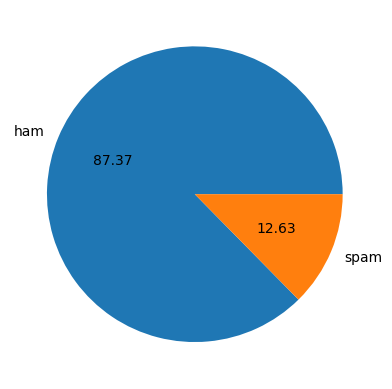

In [76]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct="%0.2f")
plt.show()

In [77]:
#Data is imbalanced

In [78]:
import nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Manish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Manish\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Manish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [79]:
df['num_alphabets'] = df['text'].apply(len)

In [80]:
df.head()

,target,text,num_alphabets
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [81]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [82]:
df.head()

,target,text,num_alphabets,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [83]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [84]:
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [85]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [86]:
df.head()

,target,text,num_alphabets,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [87]:
df[['num_alphabets','num_words','num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [88]:
#ham
df[df['target'] == 0][['num_alphabets','num_words','num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [89]:
#spam
df[df['target'] == 1][['num_alphabets','num_words','num_sentences']].describe()

,num_alphabets,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [90]:
import seaborn as sns

<Axes: xlabel='num_alphabets', ylabel='Count'>

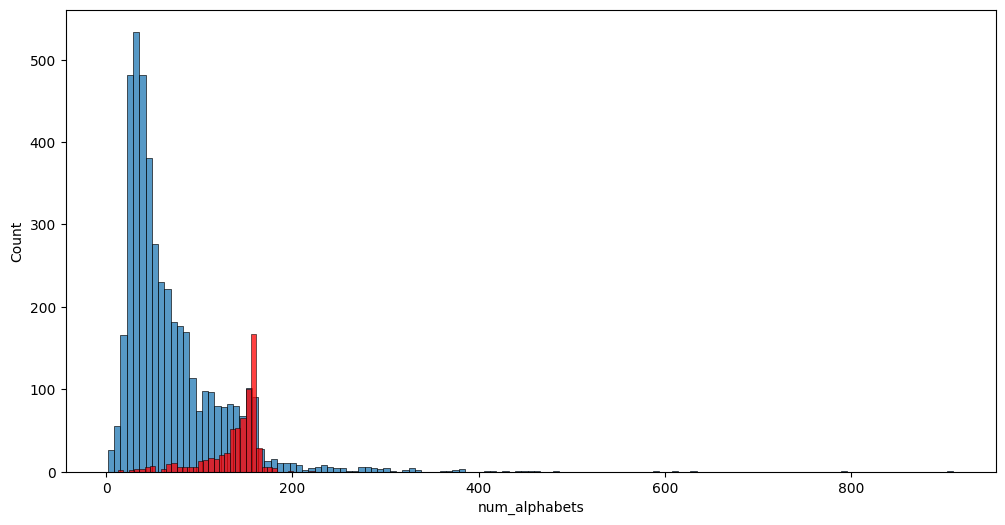

In [91]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_alphabets'])
sns.histplot(df[df['target']==1]['num_alphabets'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

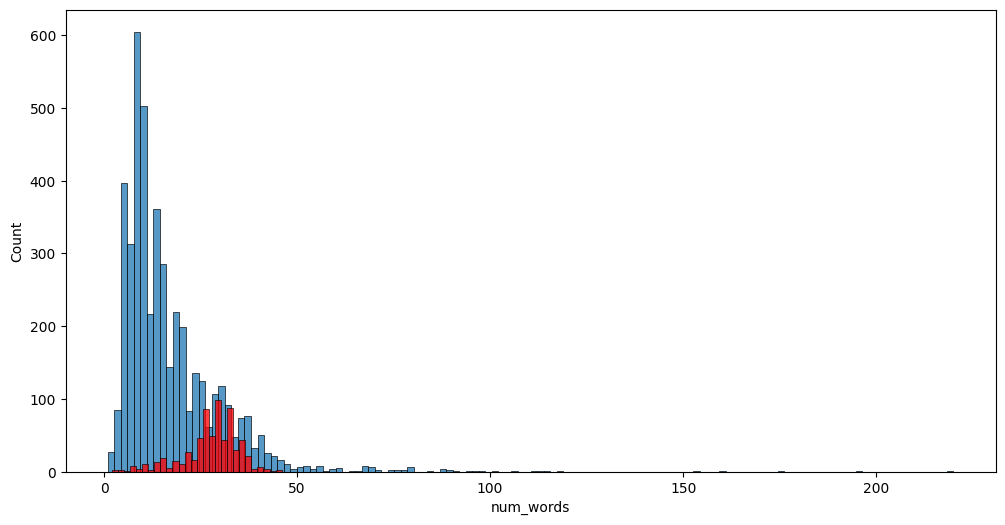

In [92]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

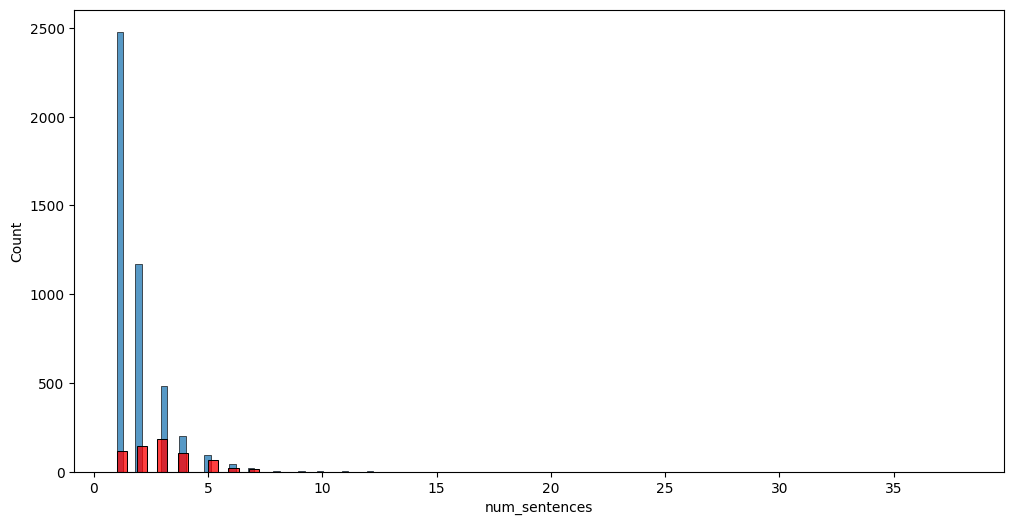

In [93]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

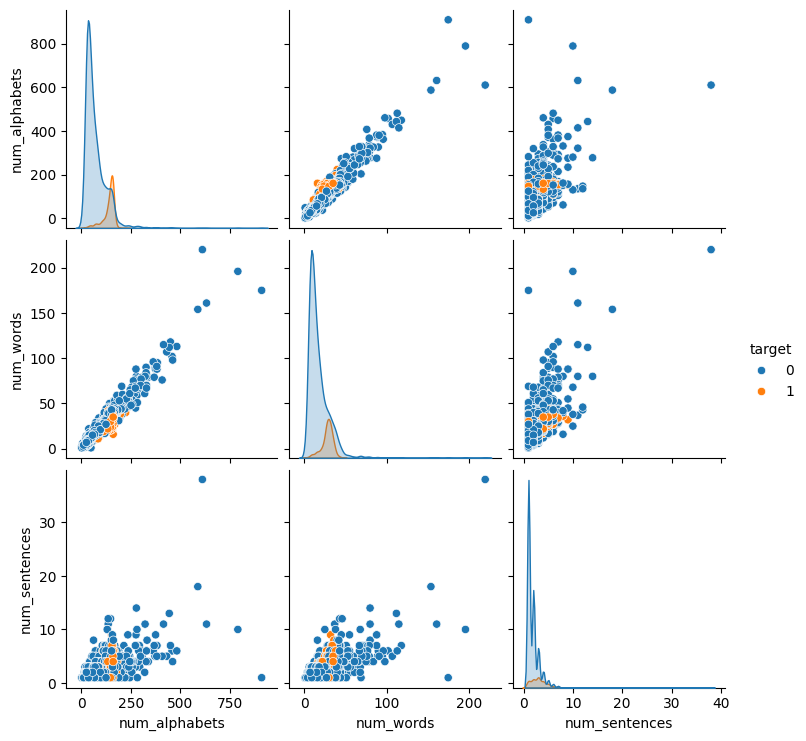

In [94]:
sns.pairplot(df,hue='target')

<Axes: >

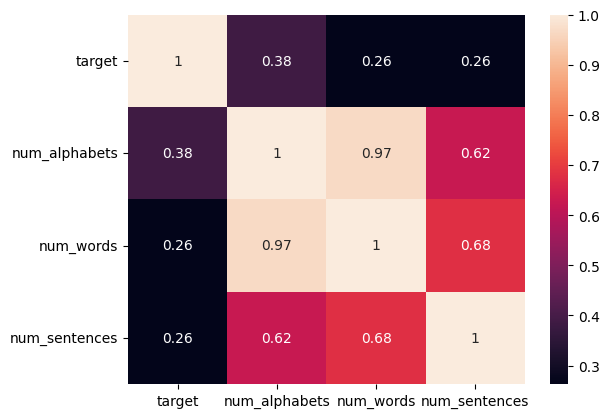

In [95]:
numeric_df = df[['target', 'num_alphabets', 'num_words', 'num_sentences']]
sns.heatmap(numeric_df.corr(), annot=True)

In [96]:
df.head()

,target,text,num_alphabets,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


3. Data Preprocessing
   -Lower case
   -tokenization
   -removing special characters
   -removing stop words and punctuation
   -stemming

In [97]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y= []
    for i in text:
         if i.isalnum():
             y.append(i)

         text = y[:]
         y.clear()
         for i in text:
             if i not in stopwords.words('english') and i not in string.punctuation:
                 y.append(i)

         text = y[:]
         y.clear()
         for i in text:
            y.append(ps.stem(i))
    return " ".join(y)

In [98]:
from nltk.corpus import stopwords
stopwords.words('english')


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [99]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [100]:
transform_text('Hi I loved the YT lectures on machine learning? How about you?')

NameError: name 'ps' is not defined

In [101]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [102]:
df['transformed_text'] = df['text'].apply(transform_text)

In [103]:
df.head()

,target,text,num_alphabets,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [104]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [105]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep= " "))

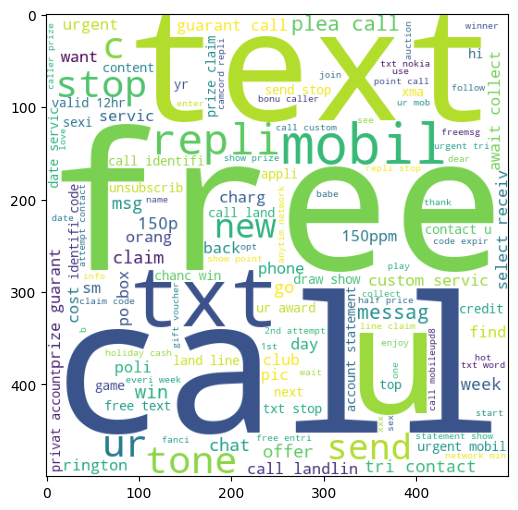

In [106]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [107]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep= " "))

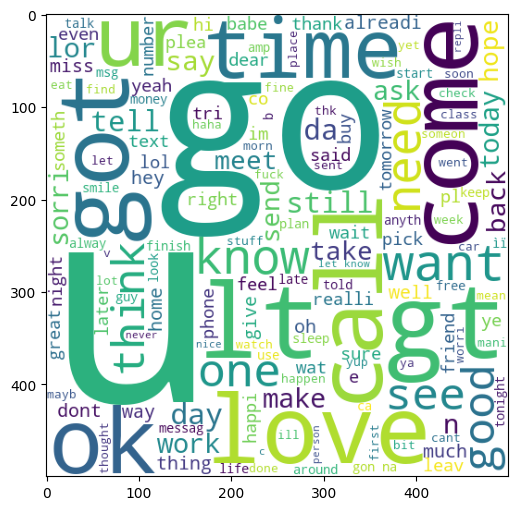

In [108]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [109]:
df.head()

,target,text,num_alphabets,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [110]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [111]:
len(spam_corpus)

9930

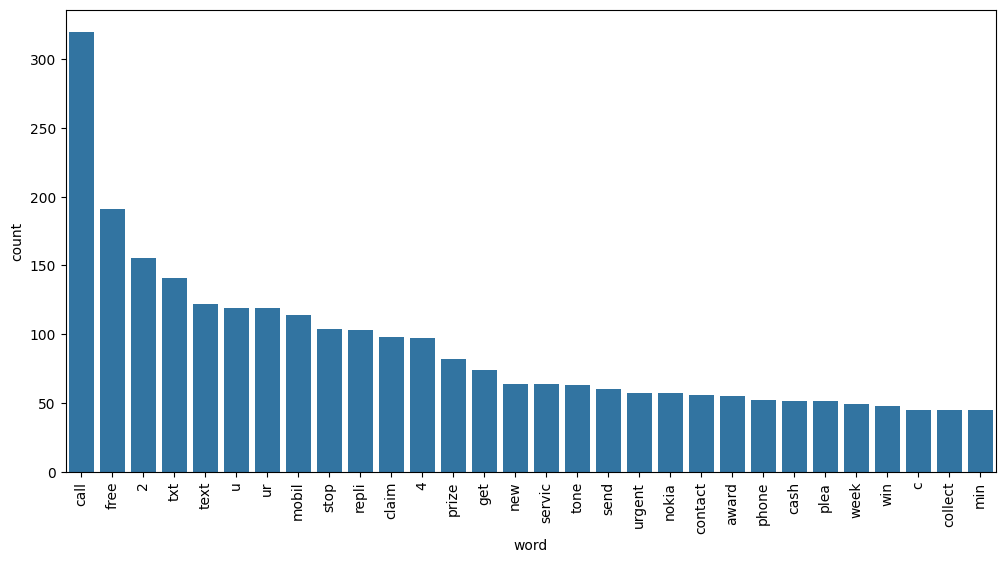

In [112]:
from collections import Counter
spam_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
spam_df = pd.DataFrame(spam_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation=90)
plt.show()

In [113]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [114]:
len(ham_corpus)

35296

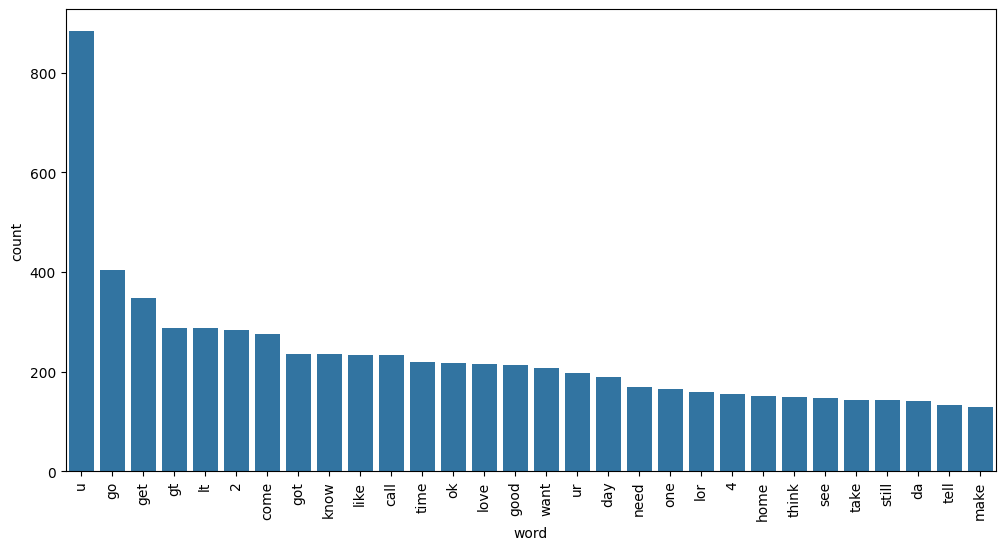

In [115]:
from collections import Counter
ham_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
ham_df = pd.DataFrame(ham_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=ham_df)
plt.xticks(rotation=90)
plt.show()

In [232]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [233]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [234]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [235]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [237]:
# appending the num_character col to X
X = np.hstack((X,df['num_alphabets'].values.reshape(-1,1)))

In [238]:
X.shape

(5169, 3001)

In [206]:
y = df['target'].values

In [207]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [260]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [261]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [262]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8781431334622823
[[787 109]
 [ 17 121]]
0.5260869565217391


In [263]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [264]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [265]:
#tfidf --> MNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [266]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [267]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [268]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [269]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9690522243713733, 0.9344262295081968)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9690522243713733
Precision -  0.9344262295081968
For  KN
Accuracy -  0.9042553191489362
Precision -  0.975609756097561
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  DT
Accuracy -  0.9284332688588007
Precision -  0.826530612244898
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143


C:\Users\Manish\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\Manish\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236


In [221]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [222]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.974855,0.982759
1,KN,0.904255,0.975610
8,ETC,0.978723,0.975410
4,LR,0.967118,0.964286
10,xgb,0.971954,0.957983
2,NB,0.978723,0.946154
0,SVC,0.969052,0.934426
9,GBDT,0.948743,0.929293
7,BgC,0.954545,0.852713
3,DT,0.928433,0.826531


In [182]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [183]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.971954
2,RF,Accuracy,0.974855
3,ETC,Accuracy,0.978723
4,SVC,Accuracy,0.976789
5,LR,Accuracy,0.956480
6,xgb,Accuracy,0.971954
7,GBDT,Accuracy,0.948743
8,BgC,Accuracy,0.954545
9,DT,Accuracy,0.932302


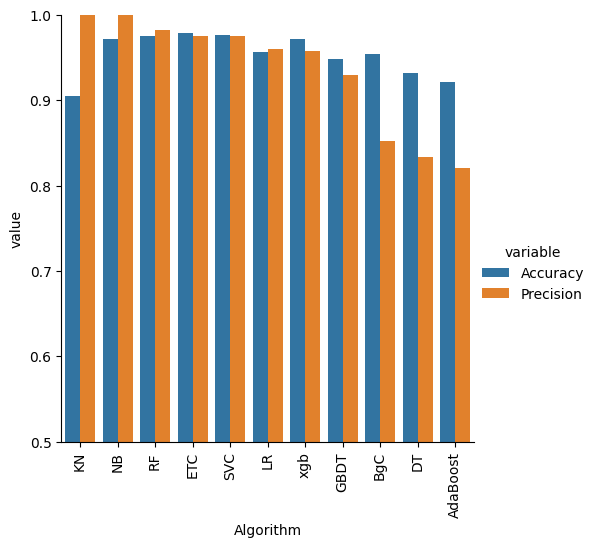

In [223]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [224]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [245]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [246]:
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [247]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [248]:
#new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [249]:
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [250]:
#new_df_scaled.merge(temp_df,on='Algorithm')

In [251]:
new_df.head()

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,RF,0.974855,0.982759,0.974855,0.982759
1,KN,0.904255,0.975610,0.904255,0.975610
2,ETC,0.978723,0.975410,0.978723,0.975410
3,LR,0.967118,0.964286,0.967118,0.964286
4,xgb,0.971954,0.957983,0.971954,0.957983


In [252]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [253]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [254]:
voting.fit(X_train,y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svm', ...), ('nb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1.0
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [255]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [256]:
from sklearn.ensemble import StackingClassifier

In [257]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [258]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9545454545454546


In [259]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))